In [9]:
from sav_extract import sav_extract
filename='iris2model_multi.sav'
iris2modelarray=sav_extract(filename)

Your file iris2model_multi.sav contains an inversion of 18 rasters, no raster number was selected so will return numpy.recarray of all 18 rasters...
...with the required structure


In [10]:
from data_extract import tag_extract, kpeak_ind_extract, trimmed_rows, data_trim

ras1=iris2modelarray[0]
wavelength  = tag_extract(ras1,'wl')
kpeak_ind   = kpeak_ind_extract(wavelength)

iris_cal_list=[]
for record in iris2modelarray:
    iris_cal_untrimmed=(tag_extract(record,'iris_cal')) # then this one to get trimmed rows from kpeak frame
#     print(iris_cal_untrimmed.shape)
    frame       = iris_cal_untrimmed[kpeak_ind,...] # create a frame at this peak wavelength, where FL is most visible
    rows=trimmed_rows(frame) # cuts FOV to only include observed data, not zeros at top and bottom (returns list of top and bottom row)
    iris_cal_list.append(data_trim(iris_cal_untrimmed, rows,'iris_cal'))


iris_cal has successfully been trimmed to (217, 183, 32)
iris_cal has successfully been trimmed to (217, 183, 32)
iris_cal has successfully been trimmed to (217, 183, 32)
iris_cal has successfully been trimmed to (217, 183, 32)
iris_cal has successfully been trimmed to (217, 183, 32)
iris_cal has successfully been trimmed to (217, 183, 32)
iris_cal has successfully been trimmed to (217, 183, 32)
iris_cal has successfully been trimmed to (217, 183, 32)
iris_cal has successfully been trimmed to (217, 183, 32)
iris_cal has successfully been trimmed to (217, 183, 32)
iris_cal has successfully been trimmed to (217, 183, 32)
iris_cal has successfully been trimmed to (217, 183, 32)
iris_cal has successfully been trimmed to (217, 183, 32)
iris_cal has successfully been trimmed to (217, 183, 32)
iris_cal has successfully been trimmed to (217, 183, 32)
iris_cal has successfully been trimmed to (217, 183, 32)
iris_cal has successfully been trimmed to (217, 183, 32)
iris_cal has successfully been 

In [11]:
len(iris_cal_list)

18

In [12]:
import numpy as np
import alphashape
from scipy.signal import find_peaks

frame_list=[]
for raster in iris_cal_list:
    frame_list.append(raster[kpeak_ind])


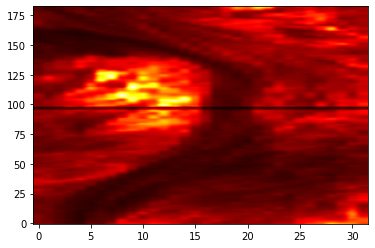

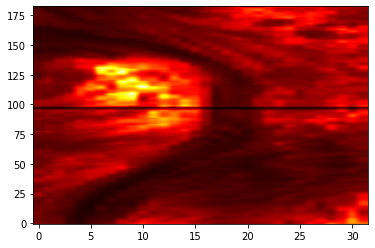

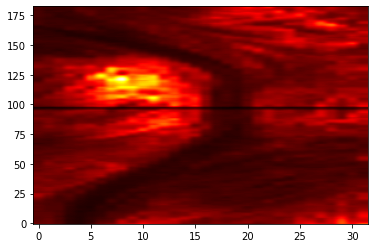

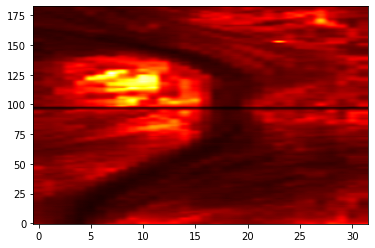

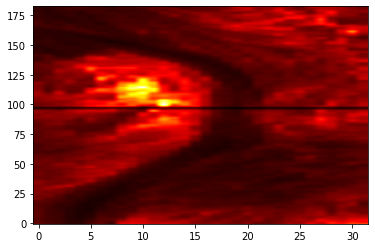

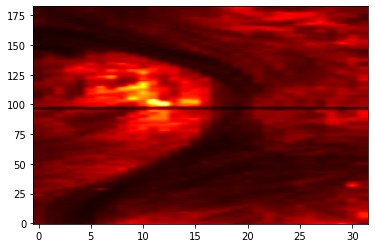

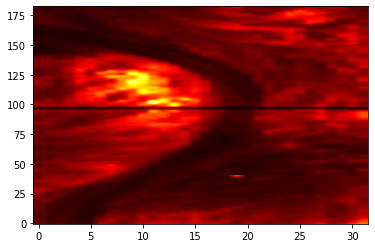

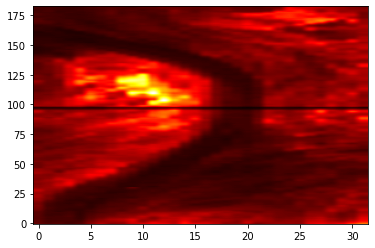

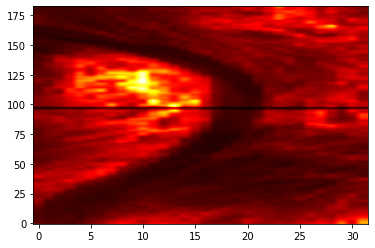

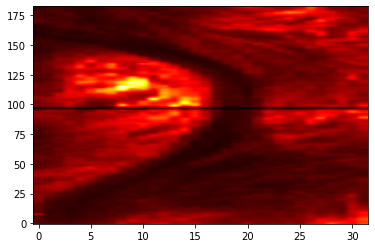

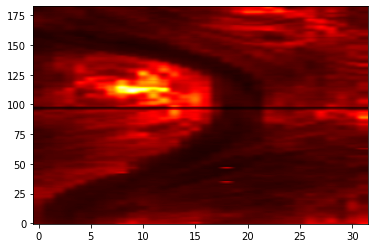

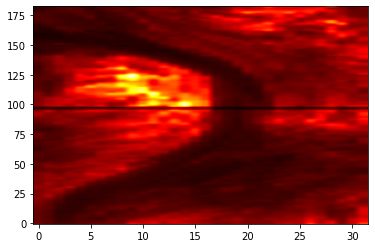

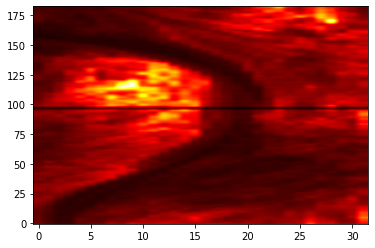

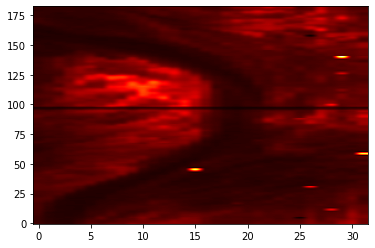

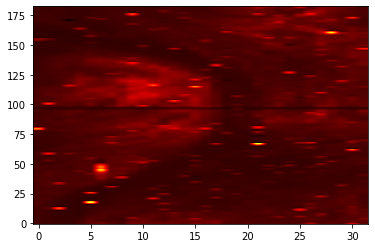

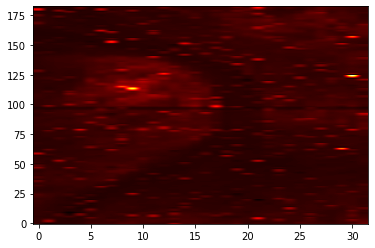

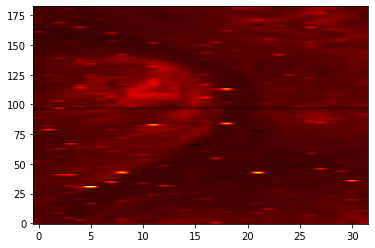

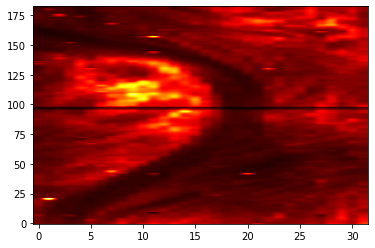

In [13]:
import matplotlib.pyplot as plt
for frame in frame_list:
    plt.imshow(frame,aspect='auto', origin='lower',interpolation=None,cmap='hot')
    plt.show()

In [14]:
#     peaks, _ = find_peaks(-n) # find troughs
#     index=peaks[0] # since bin size is so big, first trough corresponds to post-FL dip.
#     thresh=bin_centers[index] # this is the bit I can edit to try and make it universal for different observations
#     thresh=np.floor(thresh)

In [20]:
def hist_work(frame):
    
    frame_linear=np.reshape(frame,-1)
    bin_number=int(np.floor(len(frame_linear)/80))
    hist,bins = np.histogram(frame_linear, bins = bin_number) # iteratively decided on 70 bins
    bin_centres = 0.5*(bins[1:]+bins[:-1])
    return hist,bin_centres

73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73


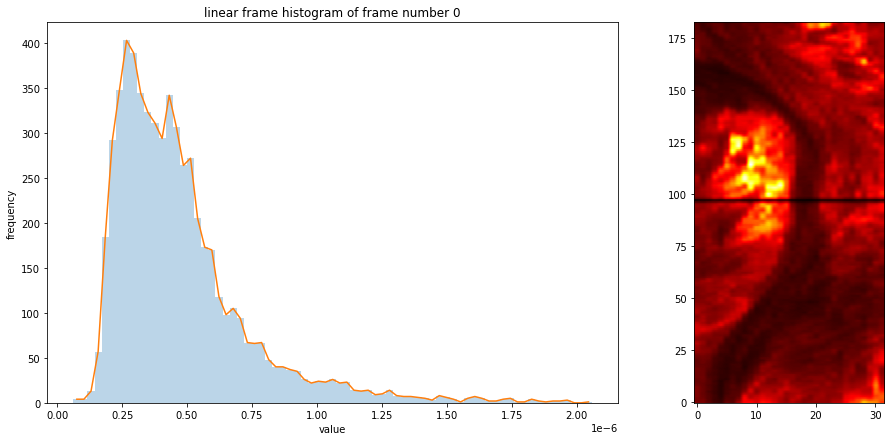

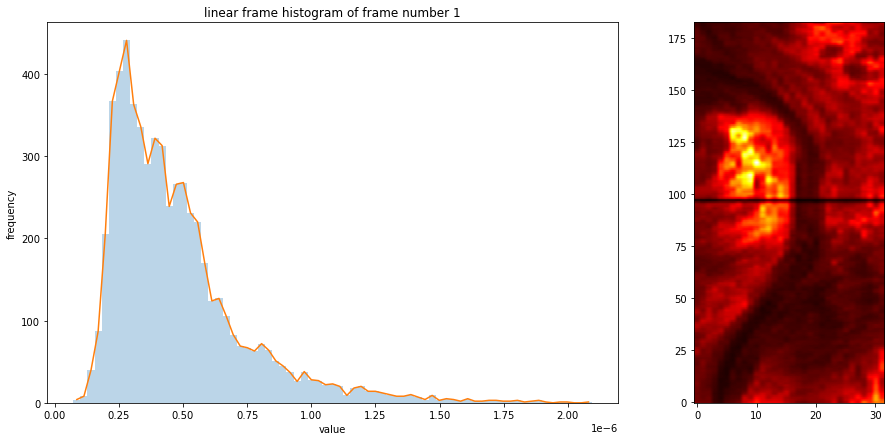

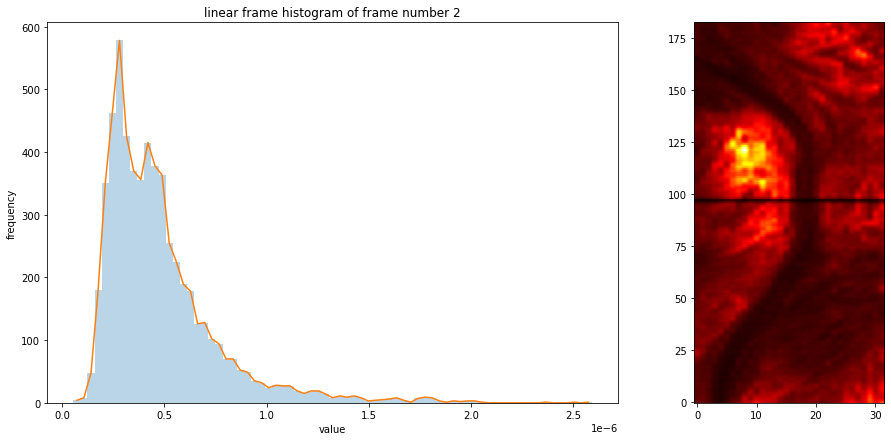

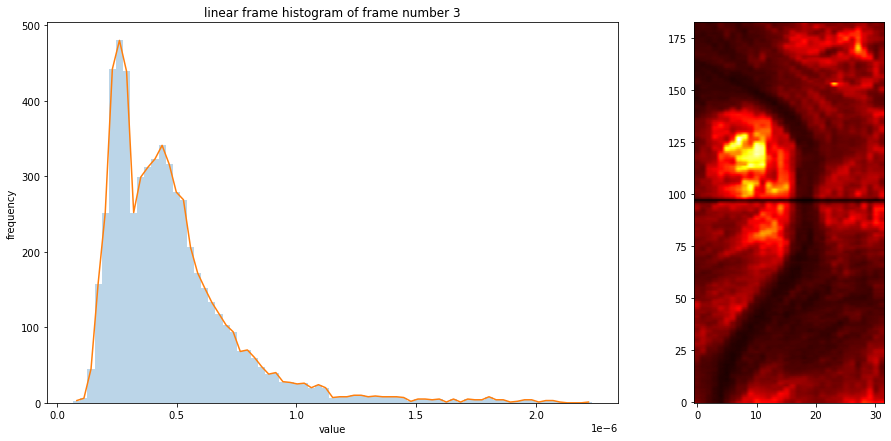

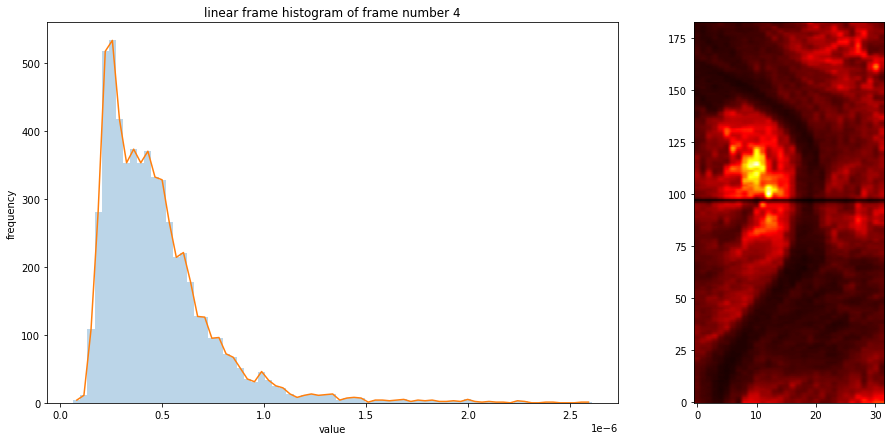

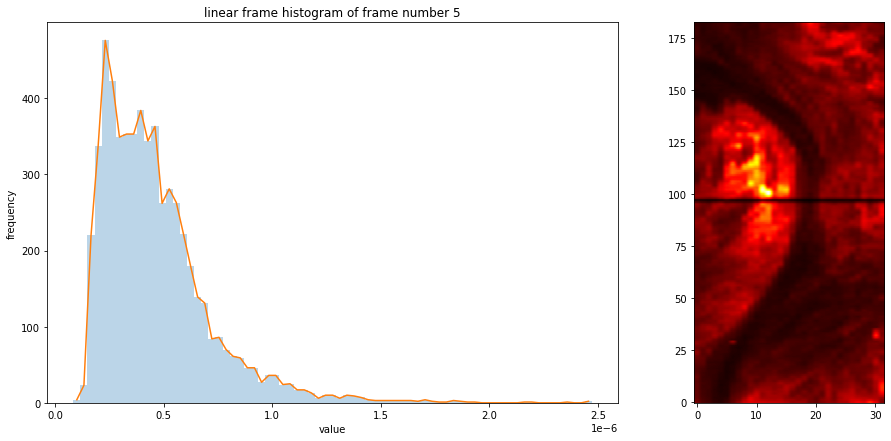

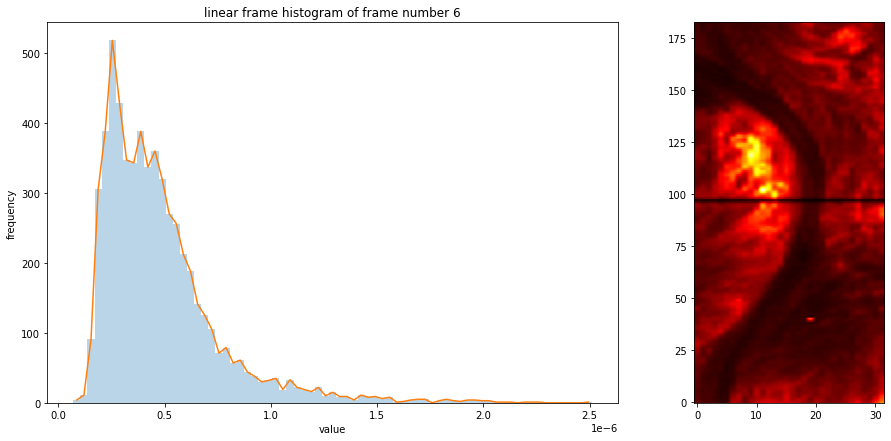

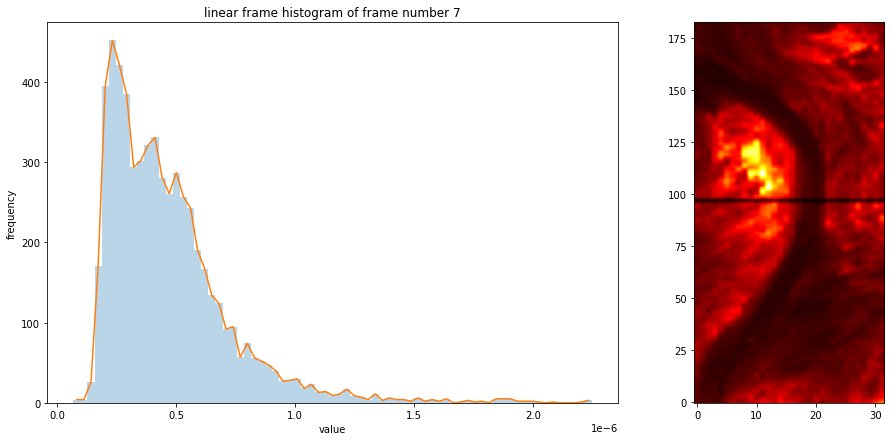

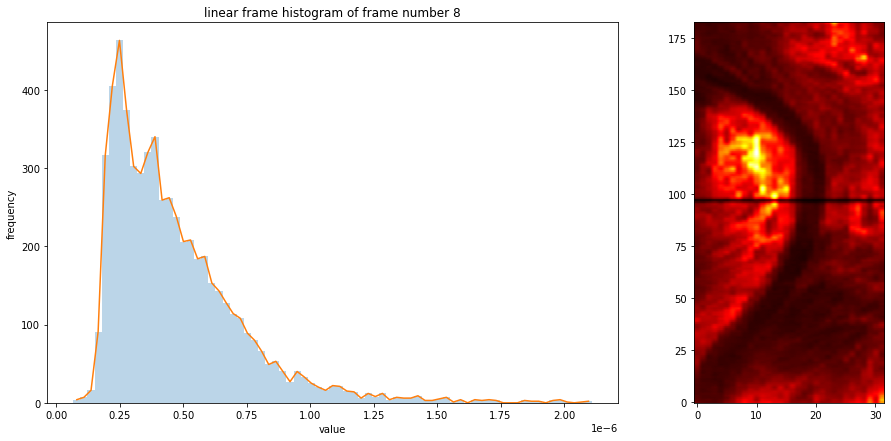

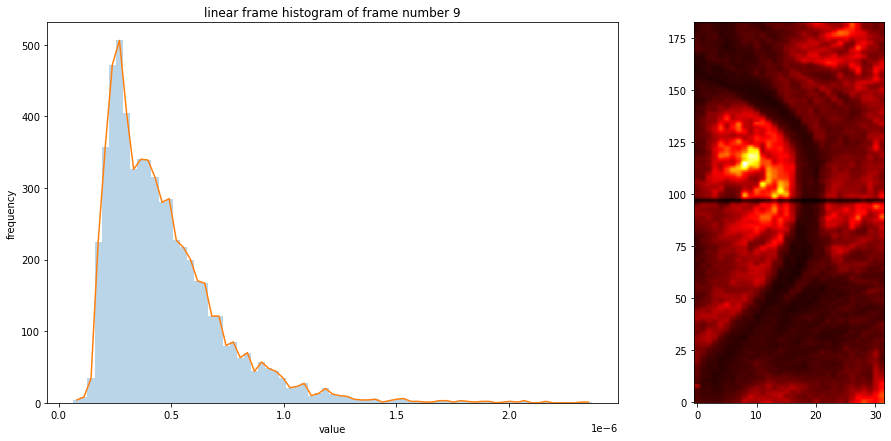

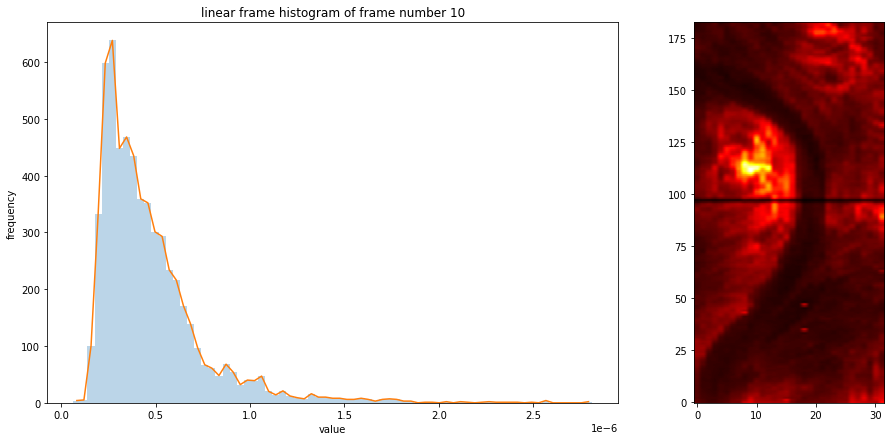

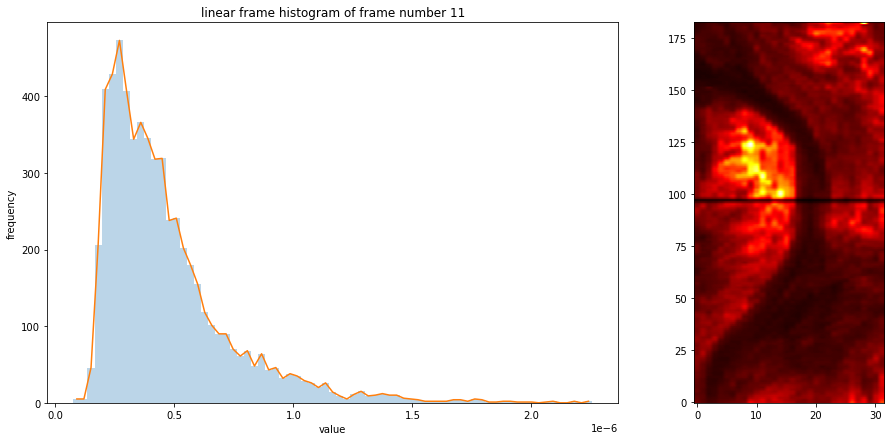

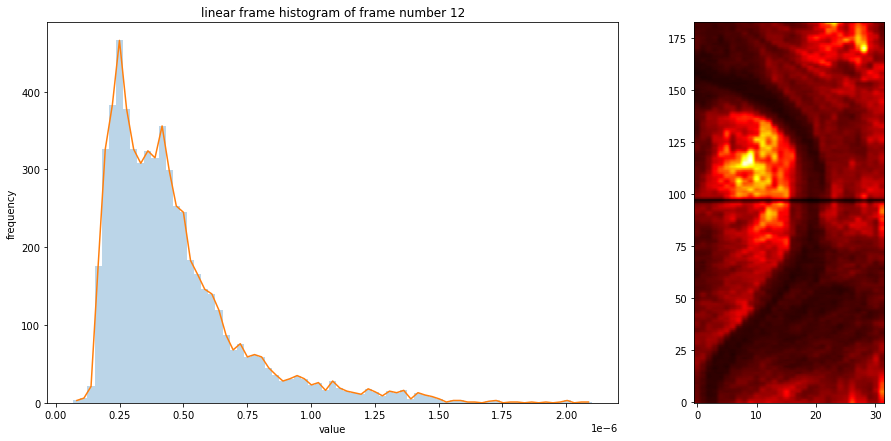

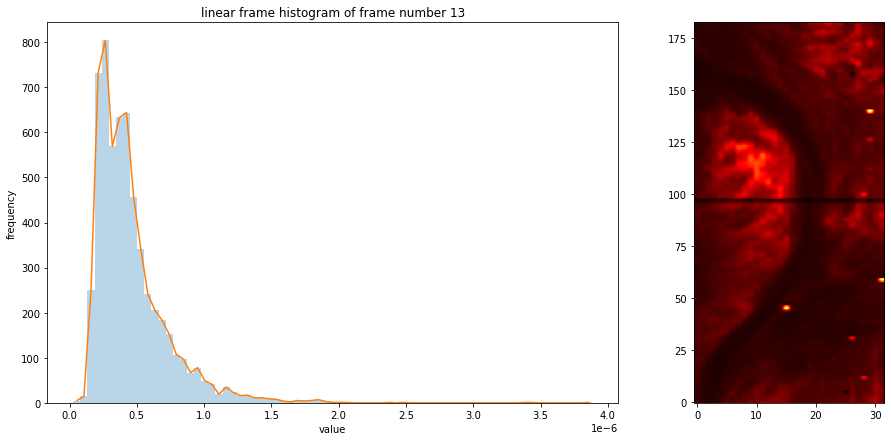

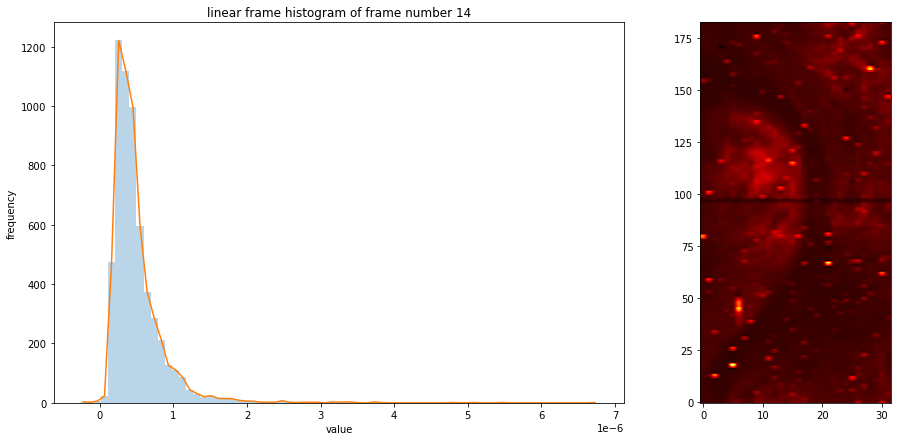

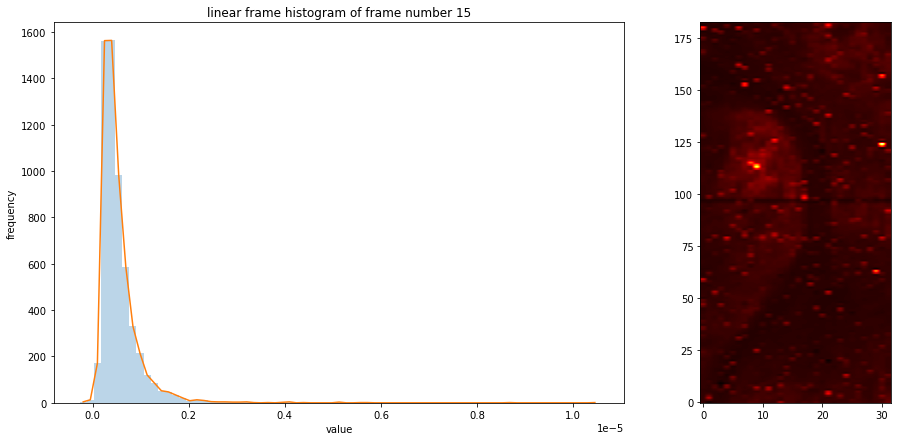

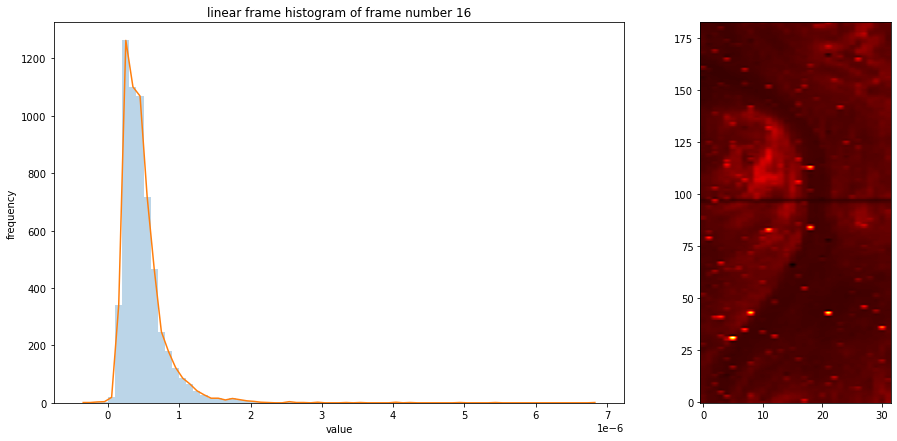

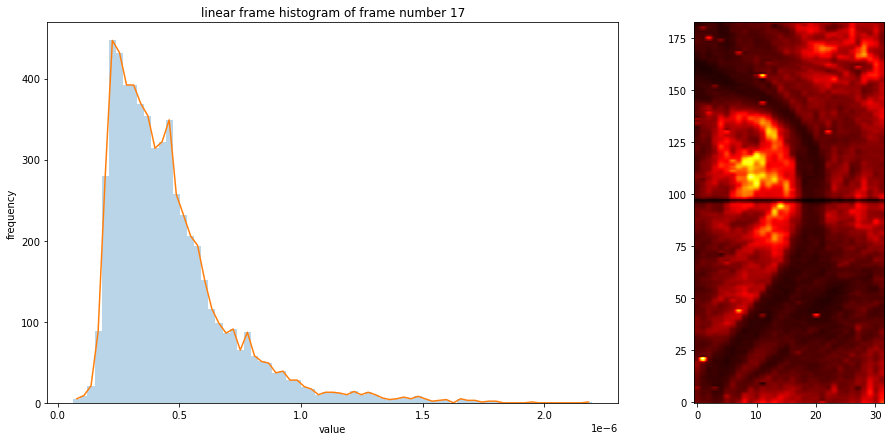

In [22]:
from matplotlib import gridspec



for frame_ind,frame in enumerate(frame_list):
    frame_linear=np.reshape(frame,-1)
    bin_number=int(np.floor(len(frame_linear)/80))
    print(bin_number)
    hist,bin_centres=hist_work(frame)
    
    plt.figure(figsize=(15,7))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
    ax0=plt.subplot(gs[0])
    ax0.set(
        title=f'linear frame histogram of frame number {frame_ind}',
        xlabel='value',
        ylabel='frequency')
    ax0.hist(frame_linear,bins=bin_number,alpha=0.3);
    ax0.plot(bin_centres,hist)
    
    ax1=plt.subplot(gs[1])
    ax1.imshow(frame,aspect='auto', origin='lower',interpolation=None,cmap='hot')
    
    
    